In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

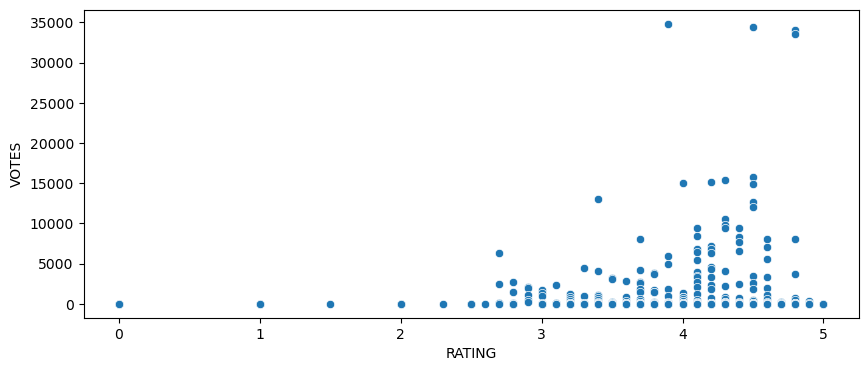

In [8]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [9]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


In [10]:
fandango['FILM']

0               Fifty Shades of Grey (2015)
1                     Jurassic World (2015)
2                    American Sniper (2015)
3                          Furious 7 (2015)
4                         Inside Out (2015)
                       ...                 
505                        Valiyavan (2015)
506              WWE SummerSlam 2015 (2015)
507         Yagavarayinum Naa Kaakka (2015)
508    Yesterday, Today and Tomorrow (1964)
509                              Zarafa (1)
Name: FILM, Length: 510, dtype: object

In [45]:
def get_year(s):
    a =s.split(' ')
    a[-1] = a[-1].replace('(','')
    a[-1]=  a[-1].replace(')','')
    return int(a[-1])

In [46]:
get_year('Valiyavan (2015)')

2015

In [47]:
fandango['YEAR'] = np.vectorize(get_year)(fandango['FILM'])

In [49]:
fandango['YEAR'].value_counts()

2015    478
2014     23
1         7
2016      1
1964      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

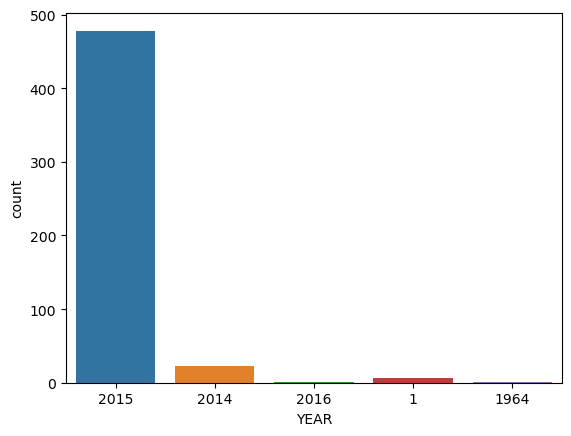

In [60]:
sns.countplot(data=fandango,x='YEAR',order=[2015,2014,2016,1,1964])

In [71]:
fandango.sort_values(by=['VOTES'],ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [75]:
len(fandango[fandango['VOTES']==0])

73

In [77]:
fandango = fandango[fandango['VOTES']>0]

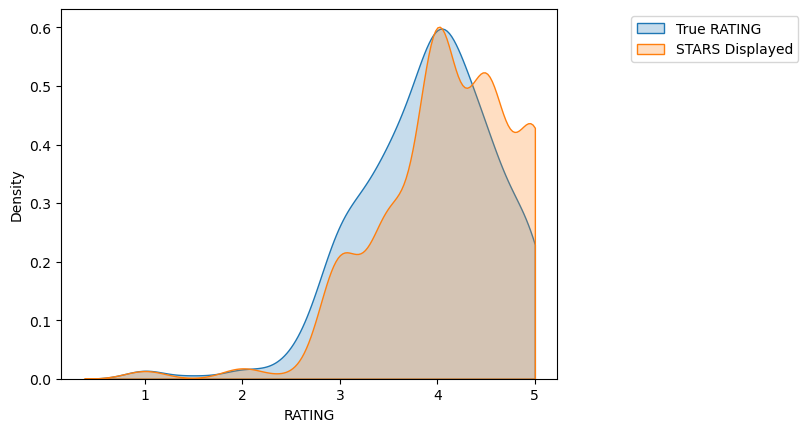

In [120]:
sns.kdeplot(x='RATING',data=fandango,shade=True,clip=(0,5),label='True RATING')
sns.kdeplot(x='STARS',data=fandango,shade=True,clip=(0,5),label='STARS Displayed')
plt.legend(bbox_to_anchor=(1.5,1))

In [109]:
fandango['DIFFERENCE'] = round(fandango['STARS']-fandango['RATING'],ndigits=2)

In [110]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='DIFFERENCE', ylabel='count'>

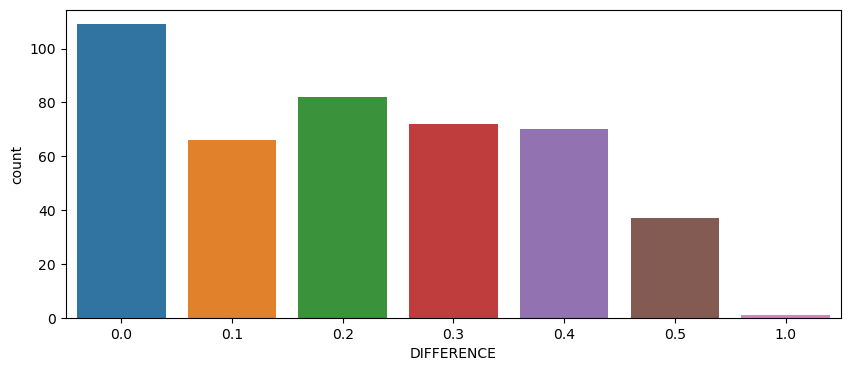

In [111]:
plt.figure(figsize=(10,4))
sns.countplot(data=fandango,x='DIFFERENCE')

In [112]:
fandango[fandango['DIFFERENCE']==1]

,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [113]:
all_sites=pd.read_csv('fandango_score_comparison.csv')

In [114]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [115]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [116]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

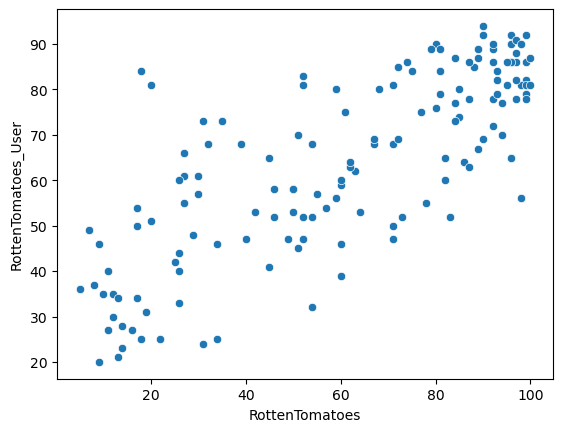

In [117]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

In [121]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [122]:
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

In [131]:
abs(all_sites['Rotten_Diff']).mean()

15.095890410958905

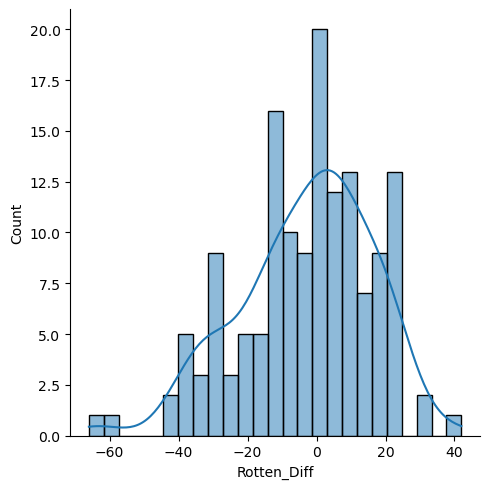

In [128]:
sns.displot(data=all_sites,x='Rotten_Diff',bins=25,kde=True)

In [133]:
all_sites['Rotten_Diff_Abs'] = all_sites['Rotten_Diff'].abs()

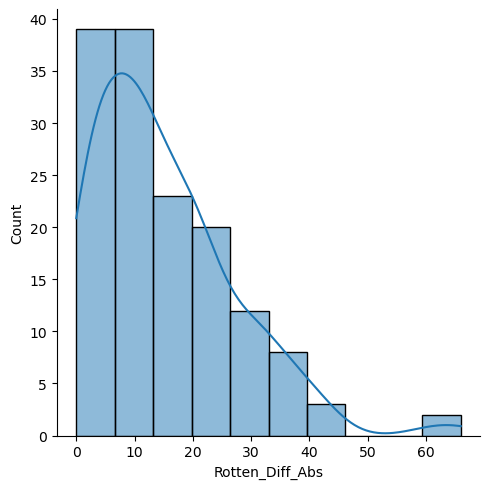

In [137]:
sns.displot(data=all_sites,x='Rotten_Diff_Abs',bins=10,kde=True)

In [142]:
all_sites.sort_values(by=['Rotten_Diff'])[:5][['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [143]:
all_sites.sort_values(by=['Rotten_Diff'],ascending=False)[:5][['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

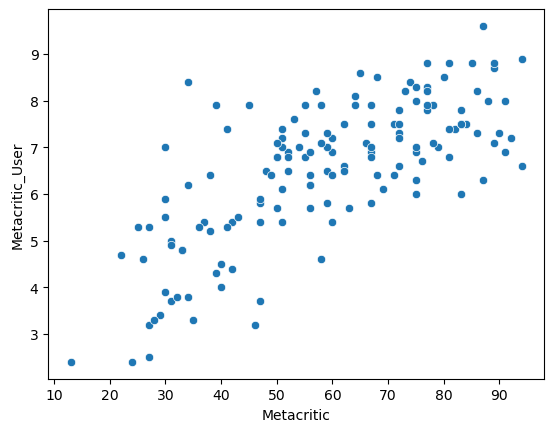

In [144]:
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

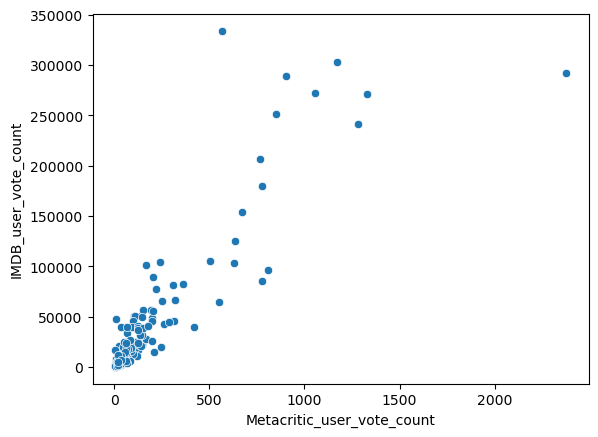

In [145]:
sns.scatterplot(data=all_sites,y='IMDB_user_vote_count',x='Metacritic_user_vote_count')

In [147]:
all_sites.sort_values(by=['IMDB_user_vote_count'],ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff,Rotten_Diff_Abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,5.0,4.6,4.5,4.6,...,4.5,3.5,4.0,4.0,566,334164,8055,0.4,-2,2


In [149]:
all_sites.sort_values(by=['Metacritic_user_vote_count'],ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff,Rotten_Diff_Abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,4.5,4.3,4.85,4.4,...,4.5,4.5,4.5,4.0,2375,292023,10509,0.2,9,9


In [150]:
final_comp =  pd.merge(left=fandango,right=all_sites,how='inner',on='FILM')

In [152]:
final_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int32  
 5   DIFFERENCE                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Fandango_Stars              145 non-null    float64
 12  Fandango_Ratingvalue        145 non-null    float64
 13  RT_norm                     145 non

In [156]:
final_comp['RT_Norm'] = np.round(final_comp['RottenTomatoes']/20,1)
final_comp['RTU_Norm'] = np.round(final_comp['RottenTomatoes_User']/20,1)
final_comp['Meta_Norm'] = np.round(final_comp['Metacritic']/20,1)
final_comp['Meta_U_Norm'] = np.round(final_comp['Metacritic_User']/2,1)
final_comp['IMDB_Norm'] = np.round(final_comp['IMDB']/2,1)

In [158]:
final_comp.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'DIFFERENCE',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference', 'Rotten_Diff',
       'Rotten_Diff_Abs', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [159]:
norm_scores=final_comp[['RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm','STARS', 'RATING']]

In [160]:
norm_scores

,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,STARS,RATING
0,1.2,2.1,2.3,1.6,2.1,4.0,3.9
1,3.6,4.0,3.0,3.5,3.6,4.5,4.5
2,3.6,4.2,3.6,3.3,3.7,5.0,4.8
3,4.0,4.2,3.4,3.4,3.7,5.0,4.8
4,4.9,4.5,4.7,4.4,4.3,4.5,4.5
...,...,...,...,...,...,...,...
140,4.4,3.2,3.4,3.2,3.4,3.5,3.5
141,4.8,4.0,4.4,3.2,3.5,4.0,3.6
142,4.6,4.2,3.4,3.5,3.9,4.5,4.2
143,4.8,4.3,4.3,3.6,3.7,4.0,3.9


<AxesSubplot:ylabel='Density'>

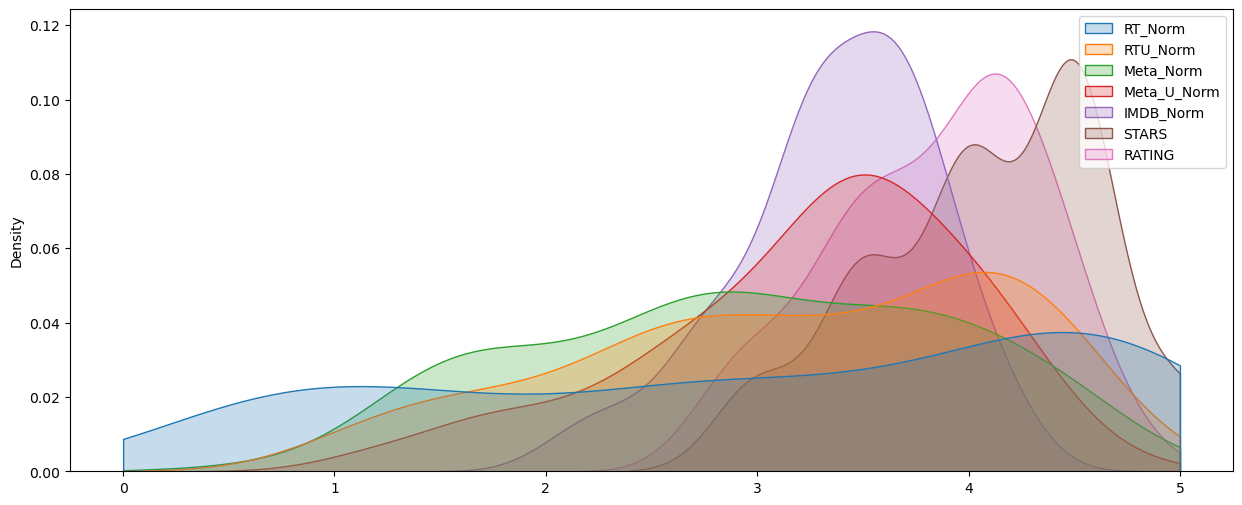

In [164]:
plt.figure(figsize=[15,6])
sns.kdeplot(data=norm_scores,shade=True,clip=[0,5])

<AxesSubplot:ylabel='Density'>

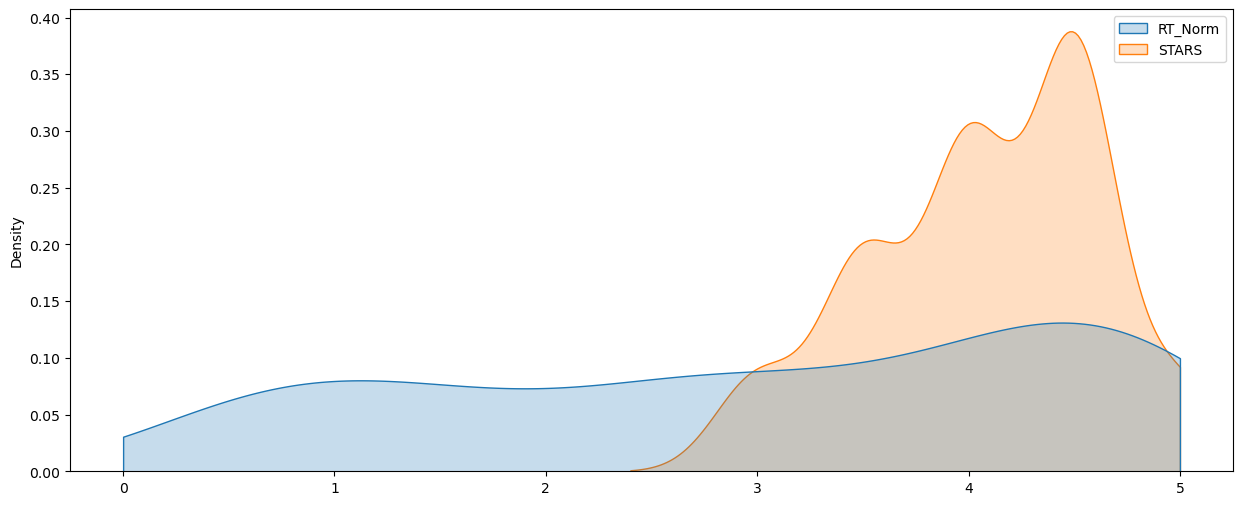

In [165]:
plt.figure(figsize=[15,6])
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],shade=True,clip=[0,5])

<AxesSubplot:ylabel='Count'>

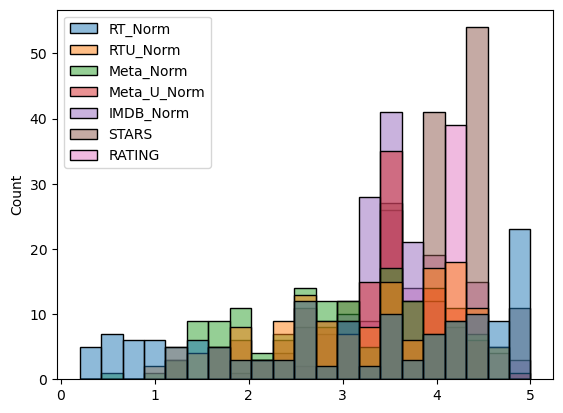

In [167]:
sns.histplot(data=norm_scores)

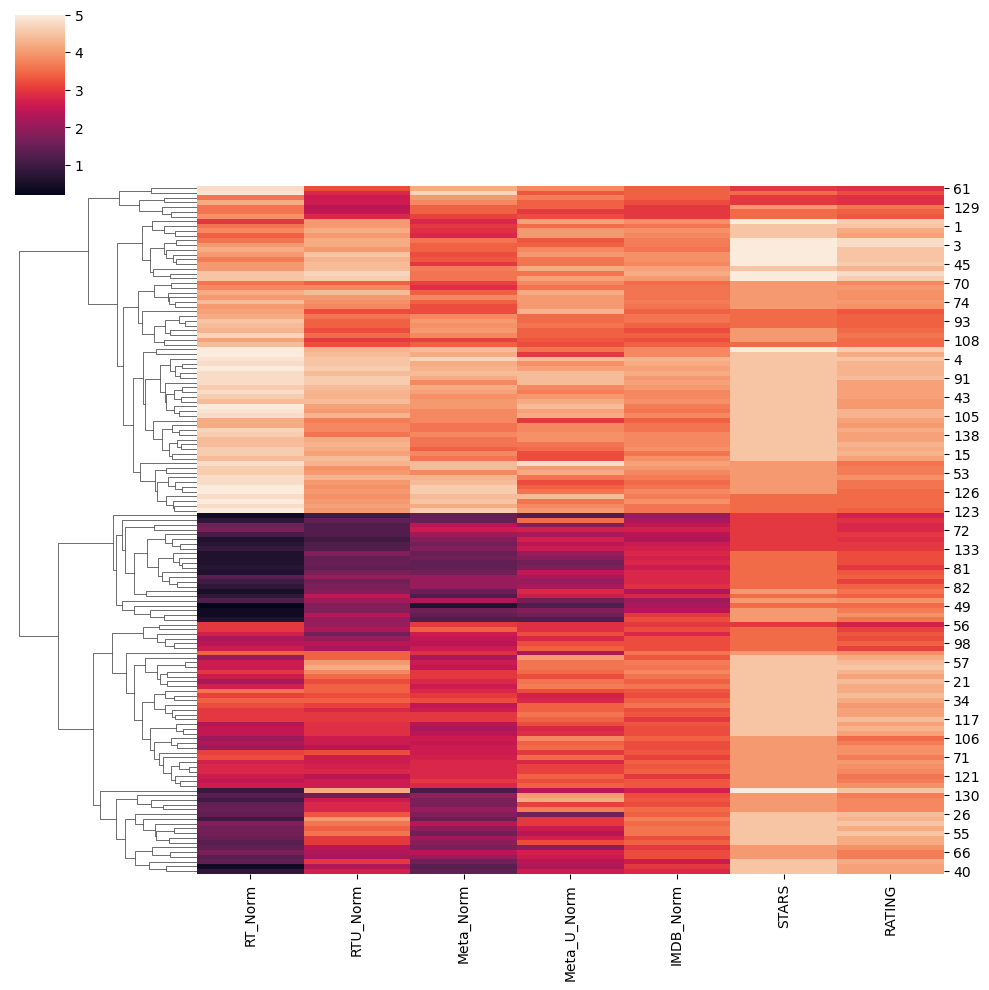

In [169]:
sns.clustermap(data=norm_scores,col_cluster=False)